### Задача 1
Поддерживать и стимулировать пользовательскую активность – важная задача для продукта, подобного нашему. Для этого наша команда маркетологов решила организовать флэшмоб в ленте новостей: участники должны сделать пост, где они рассказывают какой-то интересный факт о себе, и опубликовать его с хэштегом. Три поста, собравших наибольшее число лайков, получают призы.

Флэшмоб проходил с 2023-07-14 по 2023-07-20. Ваша задача как аналитика – оценить эффективность этого мероприятия.

1. Предположите, какие метрики должны были измениться во время флэшмоба и как. Почему? Предложите не менее 5 метрик.
2. Проверьте, реально ли эти метрики изменились, используя CausalImpact. Если изменение действительно произошло - опишите, как именно изменилась метрика и насколько.
3. Не обязательно: имел ли флэшмоб какие-то долгосрочные эффекты? 

1. Какие метрики должны измениться?
1) DAU, т.к. прямая задача - повысить вовлеченность аудитории. 
2) Количество постов, просмотренных в ленте, может возрасти ввиду повышения пользовательской активности.
3) Количество новых постов, выкладываемых в день. Может увеличиваться, потому что пользователи должны их выкладывать по условию флешмоба.
4) Количество просмотров и лайков должны вырасти с увеличением пользовательской активности.
5) CTR пользователей, т.к. ожидается увеличение просмотров
6) Мах лайков в разрезе постов, т.е. лайки лидера топ-постов за день.
7) Средняя кликабельность постов (like/view) в разрезе post_id может измениться, т.к. условием получения приза является мах лайков.

In [1]:
import pandas as pd
import pandahouse 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Метрика DAU отрисована в интервале за 2 недели до начала флешмоба и за неделю после окончания для того, чтобы отследить изменение, ведь мы помним о скачке DAU (как раз перед флешмобом=). Красным выделен интервал проведения флешмоба, видим, что DAU на нем довольно стабильно. А вот после акции заметен существенный провал DAU (пользователи "переваривали" итоги флешмоба, должно быть), с последующим восстановлением пользовательской активности.

* Количество уникальных постов (которые просмотрели/лайкнули) в ленте за день во время флешмоба, как и ожидалось, возросло.
* При этом количество новых постов, выкладывааемых в день, во время флешмоба, не сказать, что существенно выросло. В целом, укладывается в общую тенденцию.
* Общее количество просмотров и лайков за день возросло во время флешмоба.
* Поскольку общее количество просмотров в день значительно увнличилось (и лайков тоже), вовлеченность аудитории, в плане посещаемости приложения и просмотров ленты новостей, удалось поднять благодаря флешмобу.

Дневной CTR на период флешмоба изменился (подрос в некоторые дни недели, относительно прежних паттернов), однако мах не был рекордным

Мах лайков в разрезе поста (т.е. лайки лидера топ-постов) во время флешмоба ожилаемо возрос.

Средняя кликабельность постов заметно изменилась во время флешмоба, увеличилась.

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp

from causalimpact import CausalImpact

2023-08-04 13:13:36.277005: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 13:13:36.384821: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-04 13:13:36.386631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 13:13:38.050435: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## DAU

In [24]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': '****',
    'user': '****',
    'database': 'simulator_20230720'
}
#=================================================================
q = """
SELECT  toDate(time) date,
        count(distinct user_id) users
FROM simulator_20230720.feed_actions 
WHERE toDate(time) between ('2023-06-03') AND ('2023-07-27')
GROUP BY date
ORDER BY 
    date
"""
users_df = pandahouse.read_clickhouse(q, connection=connection)
users_df = users_df.set_index('date')

In [25]:
impact = CausalImpact(data=users_df, #данные
                      pre_period=['2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-04 13:33:01.092136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:33:01.146175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:33:02.339511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:

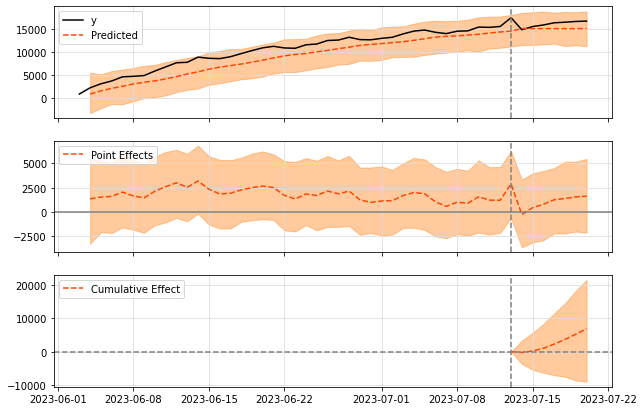

In [26]:
impact.plot()

In [27]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16052.71           112369.0
Prediction (s.d.)         15075.22 (1127.28) 105526.54 (7890.97)
95% CI                    [12893.34, 17312.21][90253.4, 121185.44]

Absolute effect (s.d.)    977.49 (1127.28)   6842.46 (7890.97)
95% CI                    [-1259.49, 3159.37][-8816.44, 22115.6]

Relative effect (s.d.)    6.48% (7.48%)      6.48% (7.48%)
95% CI                    [-8.35%, 20.96%]   [-8.35%, 20.96%]

Posterior tail-area probability p: 0.19
Posterior prob. of a causal effect: 80.62%

For more details run the command: print(impact.summary('report'))


Метрика DAU увеличилась на 978 позиций, что составляет около 6.5%. Поскольку вероятность данного события (роста DAU) составляет 19%, то оно не является статистически значимым. Соответственно, активность пользователей в статистическом смысле не обеспечена флешмобом.

## Количество постов в ленте за день

In [28]:
q = """
SELECT  count(distinct post_id) posts,
        toDate(time) date
FROM simulator_20230720.feed_actions 
GROUP BY date
ORDER BY date
"""
posts_df = pandahouse.read_clickhouse(q, connection=connection)
posts_df = posts_df.set_index('date')

In [29]:
impact = CausalImpact(data=posts_df, #данные
                      pre_period=['2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-04 13:44:25.201330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:44:25.253013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:44:26.195985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:

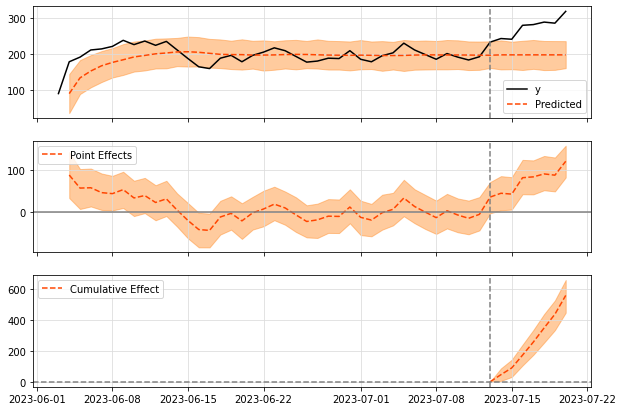

In [30]:
impact.plot()

In [31]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    277.14             1940.0
Prediction (s.d.)         197.34 (8.51)      1381.41 (59.58)
95% CI                    [180.84, 214.2]    [1265.88, 1499.42]

Absolute effect (s.d.)    79.8 (8.51)        558.59 (59.58)
95% CI                    [62.94, 96.3]      [440.58, 674.12]

Relative effect (s.d.)    40.44% (4.31%)     40.44% (4.31%)
95% CI                    [31.89%, 48.8%]    [31.89%, 48.8%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


Количество постов в ленте за день увеличивается во время флешмоба на 80 позиций (40.44%). Вероятность случайности этого события 0%, следовательно, эффект статистически значимый и обсепечен проведенным флешмобом. 

## Количество новых постов в день

In [33]:
q = """
select count(post_id) posts, start_date
from (
    select post_id,
           min(toDate(time)) start_date
    from simulator_20230720.feed_actions
    group by post_id )
group by start_date
order by start_date
"""
new_posts_df = pandahouse.read_clickhouse(q, connection=connection)
new_posts_df = new_posts_df.set_index('start_date')

In [34]:
impact_new_posts = CausalImpact(data=new_posts_df, #данные
                               pre_period=['2023-06-03', '2023-07-13'], #период до события
                               post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-04 13:51:10.511306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:51:10.545972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:51:11.368591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:

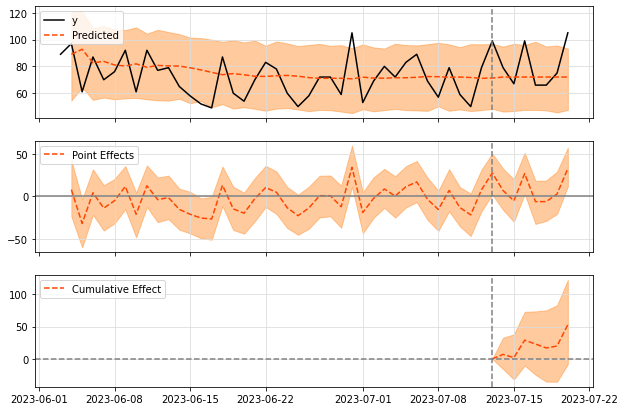

In [35]:
impact_new_posts.plot()

In [36]:
print(impact_new_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    79.57              557.0
Prediction (s.d.)         72.03 (5.01)       504.18 (35.05)
95% CI                    [62.17, 81.8]      [435.18, 572.6]

Absolute effect (s.d.)    7.55 (5.01)        52.82 (35.05)
95% CI                    [-2.23, 17.4]      [-15.6, 121.82]

Relative effect (s.d.)    10.48% (6.95%)     10.48% (6.95%)
95% CI                    [-3.09%, 24.16%]   [-3.09%, 24.16%]

Posterior tail-area probability p: 0.06
Posterior prob. of a causal effect: 94.11%

For more details run the command: print(impact.summary('report'))


Количество новых постов, появляющихся за день, выросло на 7.55 позиций (10.5%). При этом вероятность случайности такого явления 6% (жаль, что больше 5%), формально, следует, что это не вызвано флешмобом, однако я бы не согласилась со статистикой в данном случае))

## Количество просмотров

In [50]:
q = """
SELECT  countIf(action='view') posts,
        toDate(time) date
FROM simulator_20230720.feed_actions 
GROUP BY date
ORDER BY date
"""
posts_df = pandahouse.read_clickhouse(q, connection=connection)
posts_df = posts_df.set_index('date')

In [51]:
impact = CausalImpact(data=posts_df, #данные
                      pre_period=['2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-04 14:14:58.840043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:14:58.881020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:14:59.707189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:

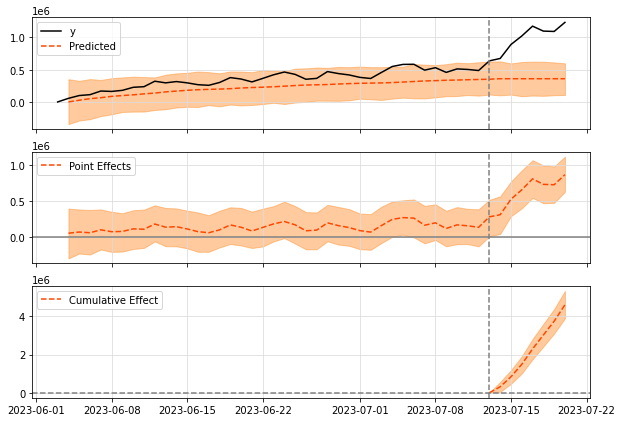

In [54]:
impact.plot()

In [52]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1019947.31         7139631.0
Prediction (s.d.)         362454.19 (49859.23)2537179.25 (349014.6)
95% CI                    [265261.6, 460706.22][1856831.12, 3224943.52]

Absolute effect (s.d.)    657493.12 (49859.23)4602452.0 (349014.6)
95% CI                    [559241.1, 754685.71][3914687.48, 5282799.88]

Relative effect (s.d.)    181.4% (13.76%)    181.4% (13.76%)
95% CI                    [154.29%, 208.22%] [154.29%, 208.22%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


Количество просмотров  за день увеличивается во время флешмоба на 657493 позиций (181.4%). Вероятность случайности этого события 0%, следовательно, эффект статистически значимый и обсепечен проведенным флешмобом. 

## Лайки

In [55]:
q = """
SELECT  countIf(action='like') likes,
        toDate(time) date
FROM simulator_20230720.feed_actions 
GROUP BY date
ORDER BY date
"""
likes_df = pandahouse.read_clickhouse(q, connection=connection)
likes_df = likes_df.set_index('date')

impact = CausalImpact(data=likes_df, #данные
                      pre_period=['2023-06-03', '2023-07-13'], #период до события
                      post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-04 14:30:54.876707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:30:54.912334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:30:55.740915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:

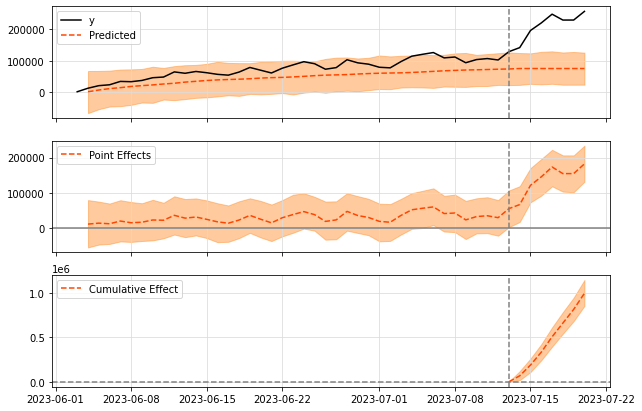

In [56]:
impact.plot()

In [57]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    218090.14          1526631.0
Prediction (s.d.)         75611.7 (10805.84) 529281.94 (75640.91)
95% CI                    [54704.32, 97062.46][382930.26, 679437.24]

Absolute effect (s.d.)    142478.44 (10805.84)997349.06 (75640.91)
95% CI                    [121027.68, 163385.82][847193.76, 1143700.74]

Relative effect (s.d.)    188.43% (14.29%)   188.43% (14.29%)
95% CI                    [160.06%, 216.09%] [160.06%, 216.09%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


Количество лайков  за день увеличивается во время флешмоба на 142478.44  позиций (188.43%). Вероятность случайности этого события 0%, следовательно, эффект статистически значимый и обсепечен проведенным флешмобом. 

## CTR за день

In [38]:
q = """
SELECT  countIf(user_id, action = 'like') / countIf(user_id, action = 'view') ctr,
        toDate(time) date
FROM simulator_20230720.feed_actions 
group by date
order by date
"""
ctr_df = pandahouse.read_clickhouse(q, connection=connection)
ctr_df = ctr_df.set_index('date')

In [39]:
impact_ctr = CausalImpact(data=ctr_df,  #данные
                         pre_period=['2023-06-03', '2023-07-13'], #период до события
                         post_period=['2023-07-14', '2023-07-20']) #период после события

2023-08-04 13:56:56.558030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:56:56.602503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:56:57.569182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 13:

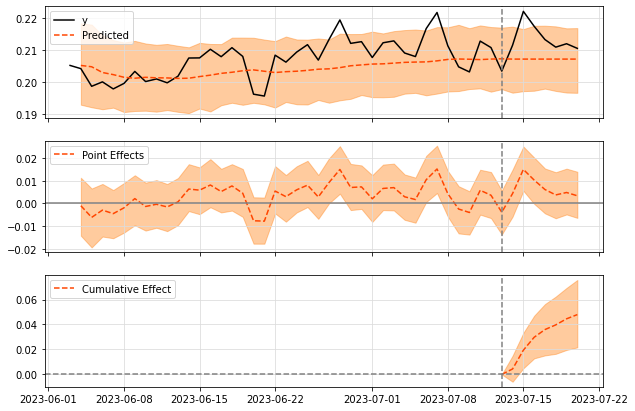

In [40]:
impact_ctr.plot()

In [41]:
print(impact_ctr.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               1.5
Prediction (s.d.)         0.21 (0.0)         1.45 (0.01)
95% CI                    [0.2, 0.21]        [1.42, 1.48]

Absolute effect (s.d.)    0.01 (0.0)         0.05 (0.01)
95% CI                    [0.0, 0.01]        [0.02, 0.08]

Relative effect (s.d.)    3.3% (0.99%)       3.3% (0.99%)
95% CI                    [1.32%, 5.18%]     [1.32%, 5.18%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


CTR подрос на 0.01 позицию (3.3%). Статистическая значимость этого подтверждается (p-value = 0), рост CTR обеспечен флешмобом.

## Мах лайков лидеров топ-постов

In [42]:
q = """
select max(liked_post) max_likes_post, date
from (
    SELECT  (count(post_id)) liked_post,
            toDate(time) date
    FROM simulator_20230720.feed_actions 
    group by date, post_id )
group by date
order by date
"""
max_likes_post_df = pandahouse.read_clickhouse(q, connection=connection)
max_likes_post_df = max_likes_post_df.set_index('date')

In [43]:
impact_max_likes = CausalImpact(data=max_likes_post_df, 
                                pre_period=['2023-06-03', '2023-07-13'], 
                                post_period=['2023-07-14', '2023-07-20'])

2023-08-04 14:02:15.428057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:02:15.463952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:02:16.325348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:

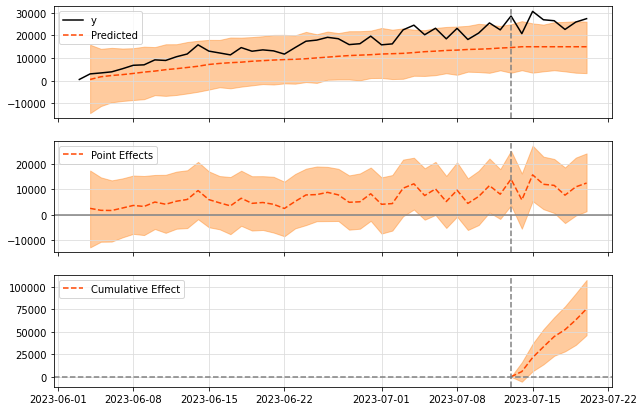

In [44]:
impact_max_likes.plot()

In [45]:
print(impact_max_likes.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    25799.29           180595.0
Prediction (s.d.)         14995.43 (2174.21) 104968.02 (15219.46)
95% CI                    [10812.0, 19334.74][75683.99, 135343.18]

Absolute effect (s.d.)    10803.85 (2174.21) 75626.98 (15219.46)
95% CI                    [6464.55, 14987.29][45251.82, 104911.01]

Relative effect (s.d.)    72.05% (14.5%)     72.05% (14.5%)
95% CI                    [43.11%, 99.95%]   [43.11%, 99.95%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


Мах лайков у лидера топ-постов во время флешмоба увеличился на 10803 единицы (72%). При этом случайность характера такого роста имеет вероятность 0, поэтому однозначно рост мах лайков обеспечен флешмобом.

## Средняя кликабельность постов по дням в разрезе посотов

In [46]:
q = """
select avg(clickable_post) avg_clickable_post, date
from (
    SELECT  (countIf(post_id, action='like') / countIf(post_id, action='view')) clickable_post,
            toDate(time) date
    FROM simulator_20230720.feed_actions 
    group by date, post_id )
group by date
order by date
"""
avg_clickable_post_df = pandahouse.read_clickhouse(q, connection=connection)
avg_clickable_post_df = avg_clickable_post_df.set_index('date')

In [47]:
impact_avg_clickable = CausalImpact(data=avg_clickable_post_df, 
                                    pre_period=['2023-06-03', '2023-07-13'], 
                                    post_period=['2023-07-14', '2023-07-20'])

2023-08-04 14:06:31.035357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:06:31.073411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:06:31.836391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-08-04 14:

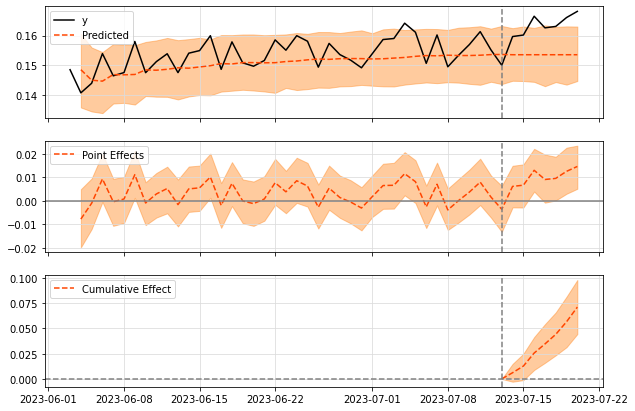

In [48]:
impact_avg_clickable.plot()

In [49]:
print(impact_avg_clickable.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.16               1.15
Prediction (s.d.)         0.15 (0.0)         1.07 (0.01)
95% CI                    [0.15, 0.16]       [1.05, 1.1]

Absolute effect (s.d.)    0.01 (0.0)         0.07 (0.01)
95% CI                    [0.01, 0.01]       [0.04, 0.1]

Relative effect (s.d.)    6.62% (1.22%)      6.62% (1.22%)
95% CI                    [4.18%, 8.98%]     [4.18%, 8.98%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


Средняя кликабельность постов в абсолютном смысле выросла на 0.01, а в относительном - на 6.62%. При этом явление статистически значимо, т.е. флешмоб повлиял на кликабельность публикаций положительно.

# Выводы
Выбранные для анализа метрики показали рост в большей или меньшей степени. Кроме метрик DAU и количества новых постов в день, все метрики имеют статистически значимый рост. Таким образом, проведенный флешмоб оказался эффективен для вовлеченности пользователей.